In [1]:
import sys
import numpy as np
from numba import njit
import scipy
from matplotlib import pyplot as plt

source = "../source"
sys.path.append(source)

import publication

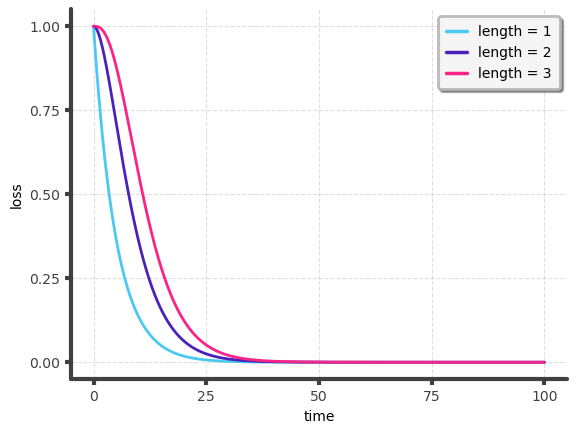

In [2]:
t = np.linspace(0, 100, 1000)
a0 = 0
eta = 0.1


def loss(t, n, a0, eta):
    return (-1 * ((1 + a0) * np.exp(-eta * t) - 1) ** n + (-1) ** n) ** 2


lengths = [1, 2, 3]
publication.set_color_gradient(1, len(lengths))
for n in lengths:
    L = loss(t, n, a0, eta)
    plt.plot(t, L, label=f"length = {n}")
plt.legend()
plt.xlabel("time")
plt.ylabel("loss")
publication.plt_show()

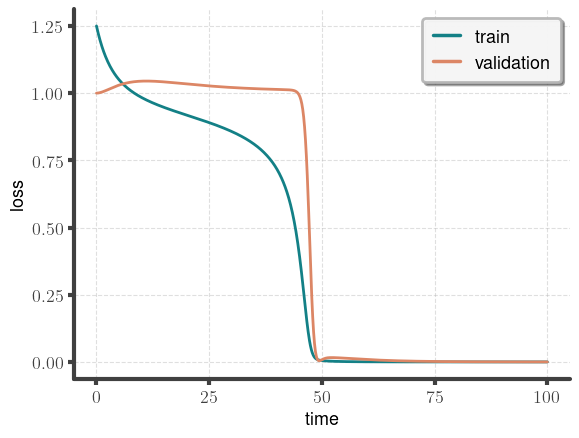

In [3]:
EPSILON = 1e-20


def der(t, z, eta, train_lengths):
    """Right hand side of the 3d ode system."""
    a, b, o = z

    a, b, o = a + EPSILON, b + EPSILON, o + EPSILON
    return [
        -eta
        * np.mean(
            [
                2 * o * n * a ** (n - 1) * (o * a**n + b - (-1) ** n)
                for n in train_lengths
            ]
        ),
        -eta
        * np.mean(
            [2 * (o * a**n + b - (-1) ** n) for n in train_lengths],
        ),
        -eta
        * np.mean(
            [2 * a**n * (o * a**n + b - (-1) ** n) for n in train_lengths],
        ),
    ]


# def der(t, z, eta, train_lengths):
#     """Right hand side of the 3d ode system."""
#     a, b, o = z
#     a, b, o = a + EPSILON, b + EPSILON, o + EPSILON
#     return [
#         -eta
#         * np.mean(
#             [
#                 2 * o * n * a ** (n - 1) * (o * a**n + b - (-1) ** n)
#                 for n in train_lengths
#             ]
#         ),
#         0,
#         -eta
#         * np.mean(
#             [2 * a**n * (o * a**n + b - (-1) ** n) for n in train_lengths],
#         ),
#     ]


def sim(t_max, a0, b0, o0, eta, train_lengths):
    """Return solution of the 3d ode system."""

    sol = scipy.integrate.solve_ivp(
        der,
        [0, t_max],
        [a0, b0, o0],
        method="Radau",
        t_eval=np.linspace(0, t_max, 1000),
        args=(eta, train_lengths),
        dense_output=False,
    )
    t = sol.t
    a, b, o = sol.y
    return t, a, b, o


def model_out(n, a, b, o):
    return o * a**n + b


def loss(n, a, b, o):
    return (model_out(n, a, b, o) - ((-1) ** n)) ** 2


val_lengths = {10, 11}
train_lengths = set(range(0, 5)) - val_lengths
eta = 0.1

t, a, b, o = sim(t_max=100, a0=0, b0=0, o0=-0.5, eta=eta, train_lengths=train_lengths)


publication.set_color_mixed()
l_train = np.mean([loss(n, a, b, o) for n in train_lengths], axis=0)
plt.plot(t, l_train, label=f"train")
l_val = np.mean([loss(n, a, b, o) for n in val_lengths], axis=0)
plt.plot(t, l_val, label=f"validation")

# plt.plot(t, a)
# plt.plot(t, b)
# plt.plot(t, o)

# preds = []
# for N in range(100, 200):
#     pred = model_out(100, a, b, o)
#     preds.append(preds)
# dists =
# for x in np.array(preds).T:

# plt.ylim(0, 2)
plt.legend()
plt.xlabel("time")
plt.ylabel("loss")
publication.plt_show()

In [4]:
def der(t, z, eta, train_lengths):
    """Right hand side of the 2 data point system."""
    a, b, o = z
    return [
        -eta * (o**2 * a + o),
        0,
        -eta * (o - 1 + o * a**2 + a),
    ]

In [5]:
def der(t, z, eta, train_lengths):
    """Right hand side of the 2 data point system."""
    a, b, o = z
    return [
        -eta * (a + b + 1),
        -eta * (a + 2 * b + 1),
        0,
    ]

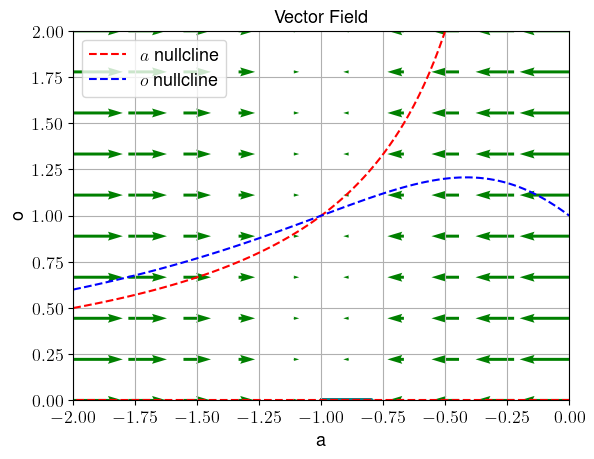

In [6]:
A = np.linspace(-2, 0, 10)
O = np.linspace(0, 2, 10)

train_lengths = set(range(0, 2))

d = np.array(
    [[der(t, (a, 0, o), eta, train_lengths=train_lengths) for a in A] for o in O]
)
da, db, do = d[:, :, 0], d[:, :, 1], d[:, :, 2]

x, y = np.meshgrid(A, O)
plt.quiver(x, y, da, do, color="g")
plt.title("Vector Field")
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))

a0, b0, o0, eta = -0.8, 0, 0, 0.1
t, a, b, o = sim(t_max=100, a0=a0, b0=b0, o0=o0, eta=eta, train_lengths=train_lengths)
plt.scatter(a, o, s=5)
# publication.set_color_gradient(0, len(a))
# for n in range(len(a)):
#     plt.scatter(a[n], o[n], s=5)

A = np.linspace(np.min(A), np.max(A), 100)

plt.plot(A[A < 0], -1 / A[A < 0], linestyle="--", color="r", label=r"$a$ nullcline")
plt.plot(A[A > 0], -1 / A[A > 0], linestyle="--", color="r")
plt.hlines(y=0, xmin=-100, xmax=100, linestyle="--", color="r")

plt.plot(A, (1 - A) / (1 + A**2), linestyle="--", color="b", label=r"$o$ nullcline")

plt.grid()
plt.legend()
plt.xlabel("a")
plt.ylabel("o")
plt.show()

In [7]:
a0, b0, o0, eta = 0, 1.75, 1, 0.1
t, a, b, o = sim(t_max=100, a0=a0, b0=b0, o0=o0, eta=eta, train_lengths=train_lengths)

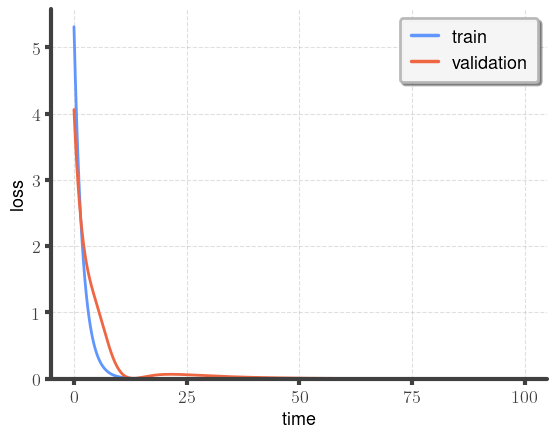

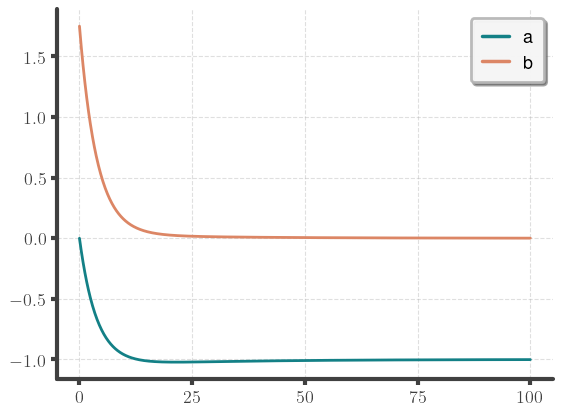

In [8]:
publication.set_color_mixed()
publication.skip_colors(5)
l_train = np.mean([loss(n, a, b, o) for n in train_lengths], axis=0)
plt.plot(t, l_train, label=f"train")
l_val = np.mean([loss(n, a, b, o) for n in val_lengths], axis=0)
plt.plot(t, l_val, label=f"validation")
plt.ylim(0)
plt.legend()
# plt.ylim(0, 3)
plt.xlabel("time")
plt.ylabel("loss")
publication.plt_show()

publication.set_color_mixed()
plt.plot(t, a, label="a")
plt.plot(t, b, label="b")

plt.legend()
publication.plt_show()

In [9]:
## DO THEORY EXAMPLE WHERE IT FAILS TO GENERALIZE
## SHOW METHOD (E.G. LONG SEQUENCE PREDICTION CHANGE) DOESNT WORK THERE

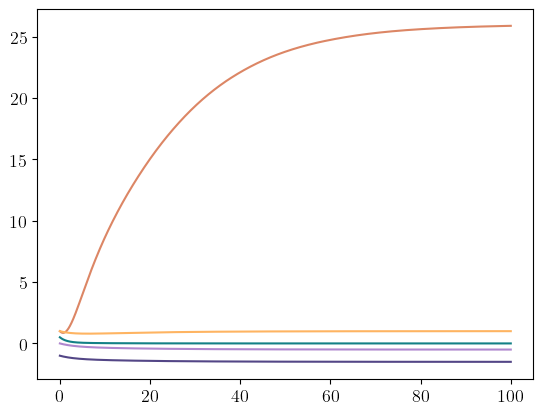

In [10]:
def der(t, z, eta, train_lengths):
    """Right hand side of the 2 data point system."""
    a, b, c = z
    return [
        -eta * (a + b + c + 1),
        -eta * (a + 2 * b + c),
        -eta * (a + b + c + 1),
    ]


def sim(t_max, a0, b0, c0, eta, train_lengths):
    """Return solution of the 3d ode system."""

    sol = scipy.integrate.solve_ivp(
        der,
        [0, t_max],
        [a0, b0, c0],
        method="Radau",
        t_eval=np.linspace(0, t_max, 1000),
        args=(eta, train_lengths),
        dense_output=False,
    )
    t = sol.t
    a, b, c = sol.y
    return t, a, b, c


a0, b0, c0, eta = -1, 1, 0, 0.1
t, a, b, c = sim(t_max=100, a0=a0, b0=b0, c0=c0, eta=eta, train_lengths=train_lengths)

train_loss = 0.5 * ((b - 1) ** 2 + (a + b + c + 1) ** 2)
N = 2  # N needs to be even
test_loss = 0.5 * (((a + c) ** N + b - 1) ** 2 + ((a + c) ** (N + 1) + b + 1) ** 2)

plt.plot(t, train_loss)
plt.plot(t, test_loss)
plt.plot(t, a)
plt.plot(t, b)
plt.plot(t, c)

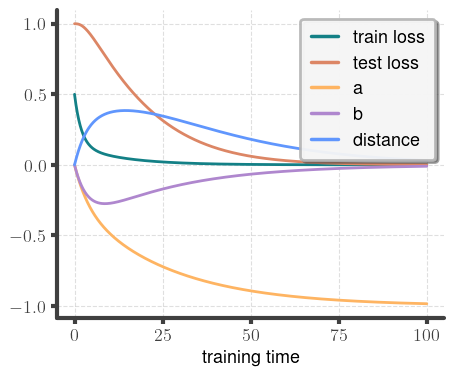

In [121]:
t = np.linspace(0, 100, 1000)
a0, b0, eta = 0, 0, 0.1

A_1 = (a0 + 1 + 0.5 * (np.sqrt(5) + 1) * b0) / (np.sqrt(5))
A_2 = A_1 - b0
C = (
    a0
    - A_1 * (1 + np.sqrt(5)) / (3 + np.sqrt(5))
    + A_2 * (np.sqrt(5) - 1) / (np.sqrt(5) - 3)
)
a_theory = (
    A_1
    * ((1 + np.sqrt(5)) / (3 + np.sqrt(5)))
    * np.exp(-0.5 * (3 + np.sqrt(5)) * eta * t)
    - A_2
    * ((-1 + np.sqrt(5)) / (-3 + np.sqrt(5)))
    * np.exp(0.5 * (-3 + np.sqrt(5)) * eta * t)
    + C
)
b_theory = A_1 * np.exp(-0.5 * (3 + np.sqrt(5)) * eta * t) - A_2 * np.exp(
    0.5 * (-3 + np.sqrt(5)) * eta * t
)

train_loss = 0.5 * ((1 + b_theory - 1) ** 2 + (a_theory + b_theory + 1) ** 2)
N = 2  # N needs to be even
test_loss = 0.5 * (
    (a_theory**N + b_theory - 1) ** 2 + (a_theory ** (N + 1) + b_theory + 1) ** 2
)


fig = plt.figure(figsize=(5, 4))
publication.set_color_mixed(0)
plt.plot(t, train_loss, label="train loss")
plt.plot(t, test_loss, label="test loss")
publication.skip_colors(1)
# publication.skip_colors(3)
plt.plot(t, a_theory, label="a")
plt.plot(t, b_theory, label="b")
plt.plot(
    t, np.abs((a_theory**1 + b_theory) - (a_theory**3 + b_theory)), label="distance"
)

# plt.ylim(-1, 1)

plt.xlabel("training time")


plt.legend()
publication.plt_show()

In [ ]:
a0, b0, o0, eta = -(3 + np.sqrt(5)) / (2 * np.sqrt(5)), 1, 1, 0.1
t, a, b, o = sim(t_max=100, a0=a0, b0=b0, o0=o0, eta=eta, train_lengths=train_lengths)


def der(t, z, eta, train_lengths):
    """Right hand side of the 2 data point system."""
    a, b, o = z
    return [
        -eta * (a + b + 1),
        -eta * (a + 2 * b + 1),
        0,
    ]


A_1 = (a0 + 1 + 0.5 * (np.sqrt(5) + 1) * b0) / (np.sqrt(5))
A_2 = A_1 - b0
C = (
    a0
    - A_1 * (1 + np.sqrt(5)) / (3 + np.sqrt(5))
    + A_2 * (np.sqrt(5) - 1) / (np.sqrt(5) - 3)
)
a_theory = (
    A_1
    * ((1 + np.sqrt(5)) / (3 + np.sqrt(5)))
    * np.exp(-0.5 * (3 + np.sqrt(5)) * eta * t)
    - A_2
    * ((-1 + np.sqrt(5)) / (-3 + np.sqrt(5)))
    * np.exp(0.5 * (-3 + np.sqrt(5)) * eta * t)
    + C
)
b_theory = A_1 * np.exp(-0.5 * (3 + np.sqrt(5)) * eta * t) - A_2 * np.exp(
    0.5 * (-3 + np.sqrt(5)) * eta * t
)

train_loss = 0.5 * (b**2 + (a + b + 1) ** 2)
N = 2  # N needs to be even
test_loss = 0.5 * ((a**N + b - 1) ** 2 + (a ** (N + 1) + b + 1) ** 2)
# test_loss = 0.5 * ((b - 1) ** 2)

# plt.plot(t, a_theory, label="a")
# plt.plot(t, b_theory, label="b")
plt.plot(t, train_loss, label="train loss")
plt.plot(t, test_loss, label="test loss")
pred_1 = a_theory**1 + b_theory
pred_2 = a_theory**2 + b_theory
epsilon = 0.01
sensitivity = np.abs(a_theory**10 * epsilon) + np.abs(a_theory**10 * (-epsilon))
plt.plot(t, sensitivity)

plt.legend()
publication.plt_show()

TypeError: sim() got an unexpected keyword argument 'o0'

/tmp/ipykernel_637/3042760827.py:3: RuntimeWarning: Degrees of freedom <= 0 for slice
  c.append(np.cov(t))
/home/loek/miniconda3/envs/rnn_structure/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/loek/miniconda3/envs/rnn_structure/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ValueError: not enough values to unpack (expected 2, got 0)

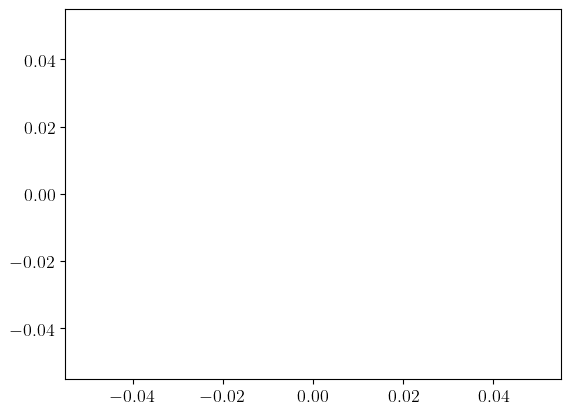

In [ ]:
c = []
for t in np.array(A).T:
    c.append(np.cov(t))
c = np.array(c)

for a in A:
    plt.plot(a / np.sqrt(c))

for t in np.array(A).T:
    scipy.spatial.distance_matrix(t, t)